##***Car Price Prediction***


#Problem Statement
One of the indian companies selling the old/refurbished cars to the customers, in this case study you have to predict the car price based on the various feature of the cars, there are around 1700+ data points based on that we need to proceed and create the linear regression model.

In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

**Data Dictionary**

**Company** - Car's company

**Name** - Name of the car model

**Year** - Make year of the car

**Selling Price** -	Selling price of the car (Dependent variable)

**Kilometer driven** -	Total kms driven by the car

**Fuel** -	Cars fuel type

**Seller Type** - Type of the seller

**Transmission** -	If the car is automatic or manual

**Owner** -	Owner type of the car

##***LOAD DATASET***

In [67]:
#read the car dekho dataset
data_url = "/content/CAR DETAILS FROM CAR DEKHO.csv"
df = pd.read_csv(data_url)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


##Project Tasks:-
Pre-processing the data.\
Missing Value Treatment \
Outlier Treatment if required \
Feature Scaling \
Encoding or any other technique to make categorial to Numerical \
#data:-
Do extensive exploratory data analysis before creating the model.
Write the detailed conclusions from the analysis. \
Identify the variables you think are the most important ones.\
Splitting the dataset into train and test sets (if required).\
Apply the algorithm which you have learnt, i.e., Linear Regression.\
Check if the assumptions of the linear regression are meeting or not.\
Remove the unwanted feature from the model by seeing the P-Value. \
At the end, write the detailed analysis and the behavior you saw from the experiments. \
Finding the best performing model using the R Squared, Adjusted R Squared, F-Test, Mean Squared error (MSE), Root mean squared error (RMSE), Mean absolute error (MAE), and Mean absolute percentage error (MAPE)

##***Understanding the Dataset***

In [68]:
# Create the new 'model' column
df['model'] = df['name'].apply(lambda x: x.split()[0])

In [69]:
# Show data quality check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   model          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB
None


In [70]:
#show the dataset compare
print(df.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [71]:
# Check for missing values if any Treat missing values
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
model            0
dtype: int64


In this dataset there are no missing values so we are good to proceed to the next steps.

In [72]:
#Len command will help us understand the total number of records present in the dataset
len(df)

4340

In [73]:
#.columns command will help us understand the columns present in the dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'model'],
      dtype='object')

In [74]:
#The below command will help us understand the total number of columns present in the dataset
len(df.columns)

9

In [75]:
#shape
df.shape

(4340, 9)

#check duplicate row if any drop it

In [76]:
# Check duplicated row in dataset
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,model
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner,Mahindra
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner,Maruti
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner,Datsun
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner,Renault


In [77]:
# Drop all duplicated row
df = df.drop_duplicates()

df.shape

(3577, 9)

##***Exploratory Data Analysis (EDA)***

#Analysis whole data using module sweetviz

In [110]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 68.8 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


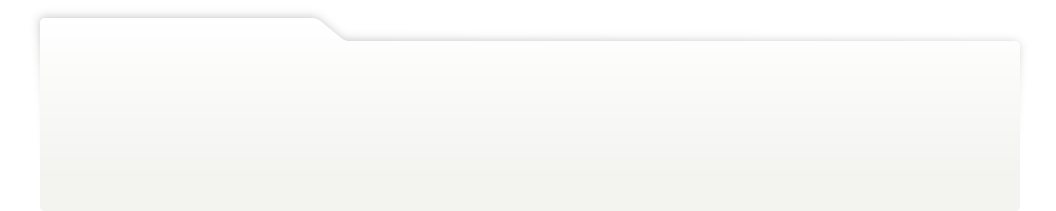
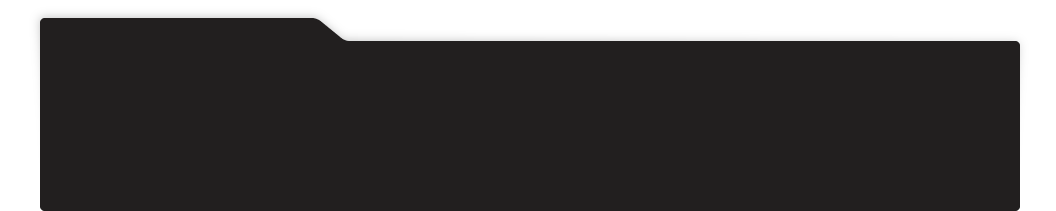
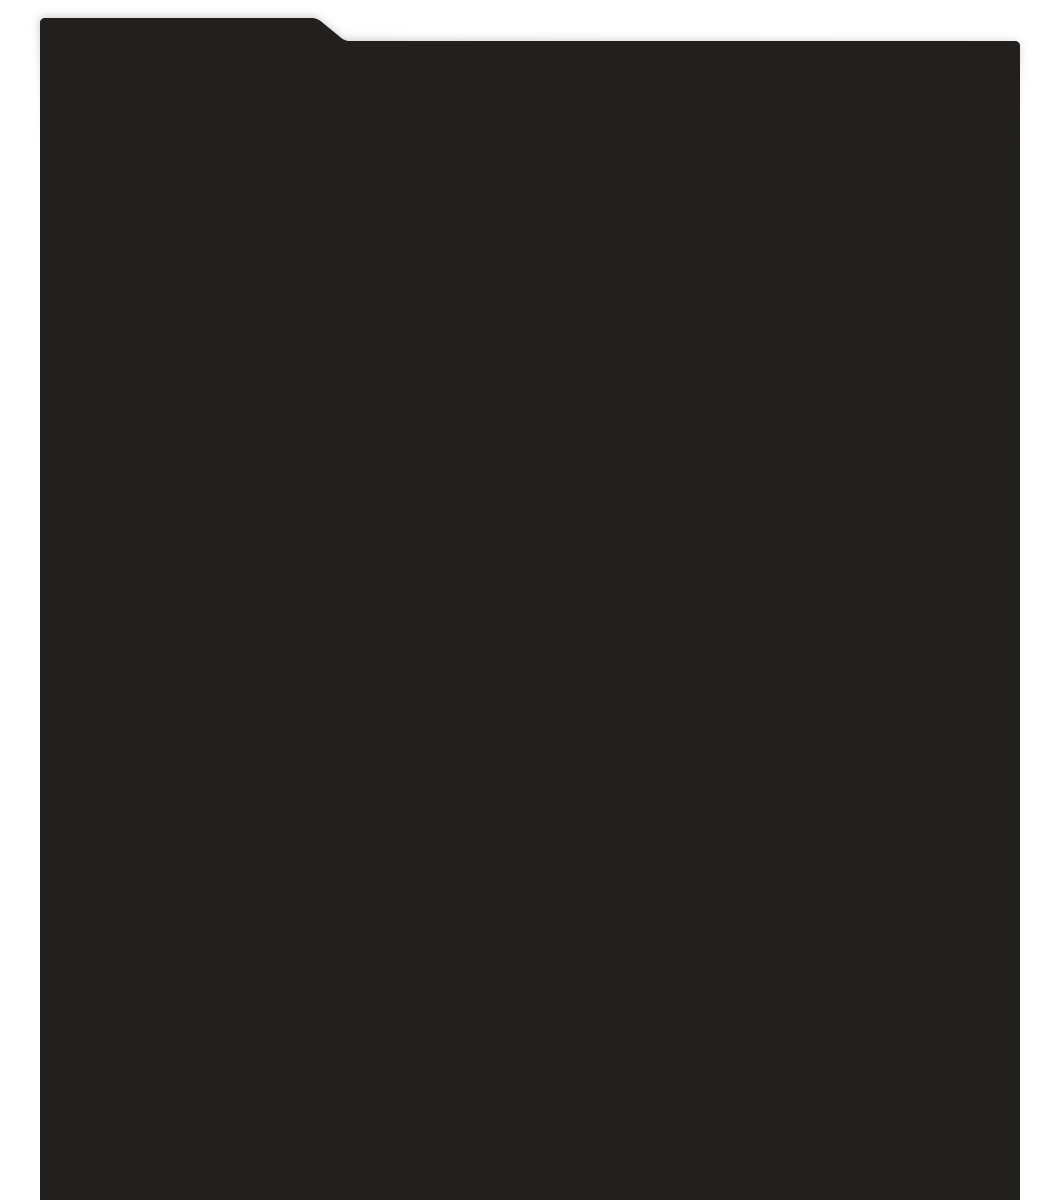
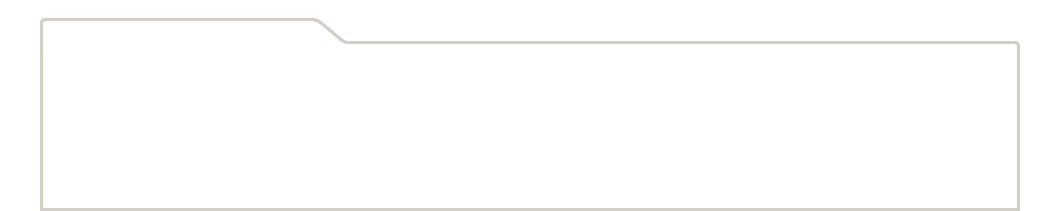
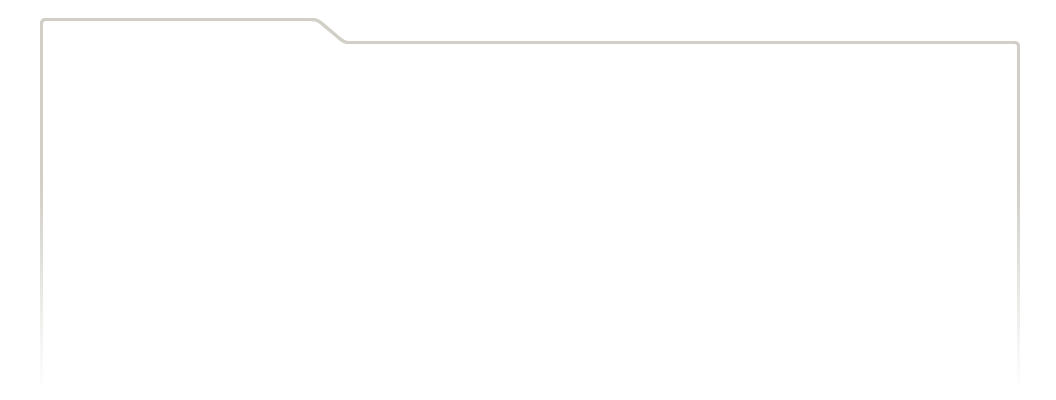
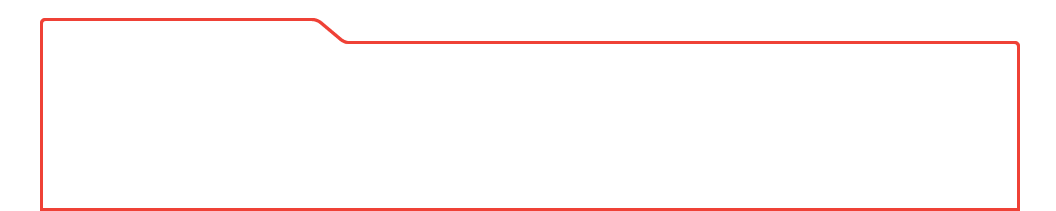
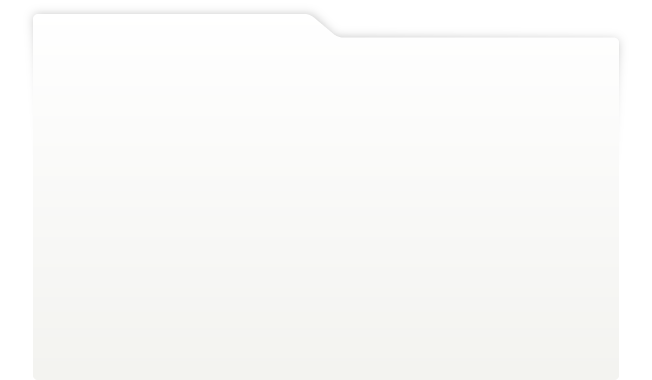
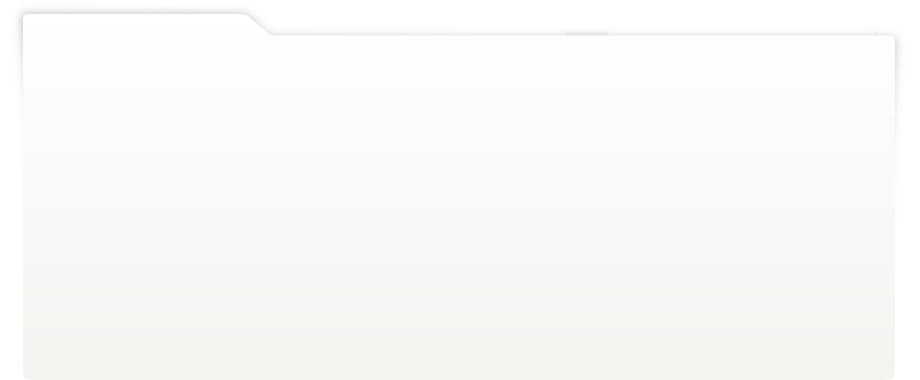
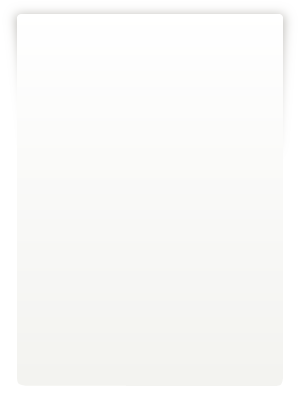
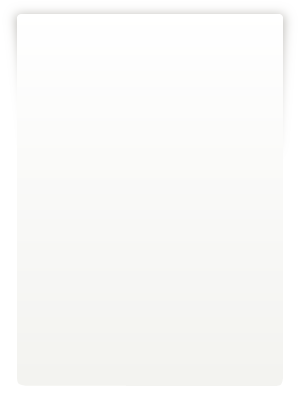
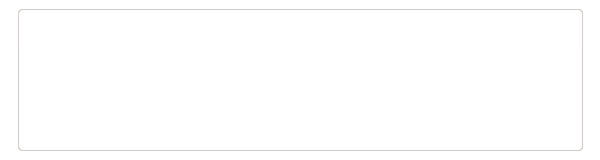
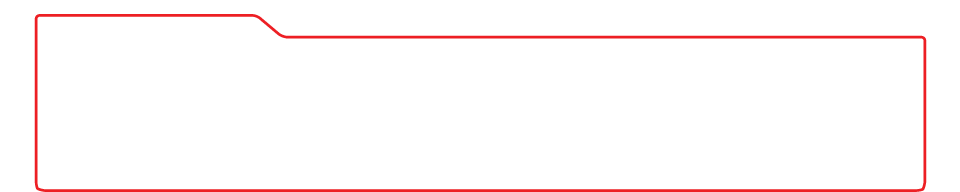
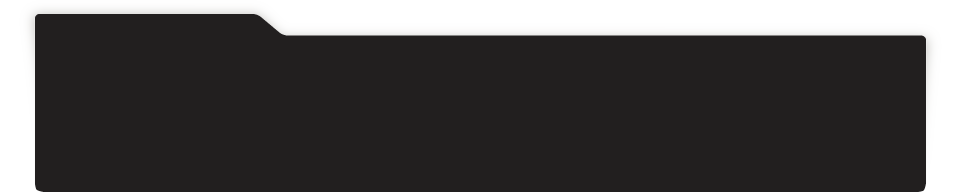
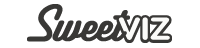
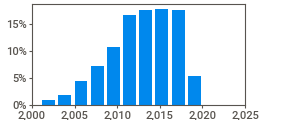
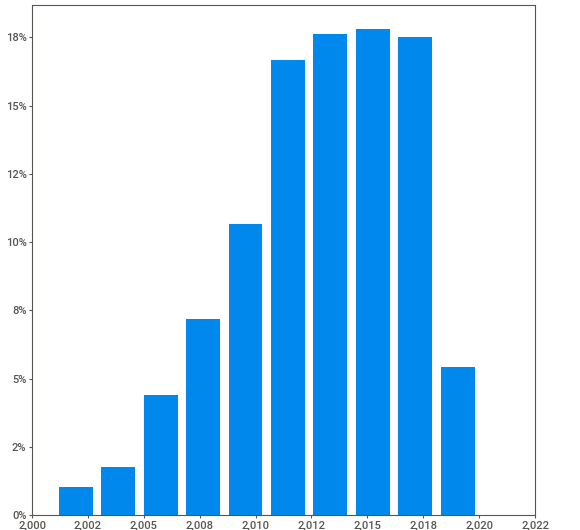
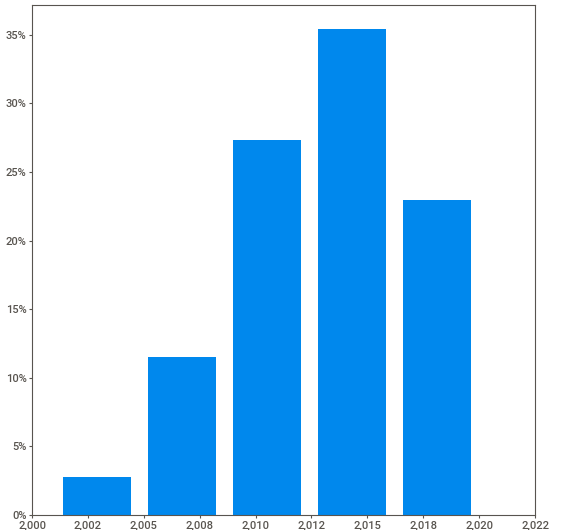
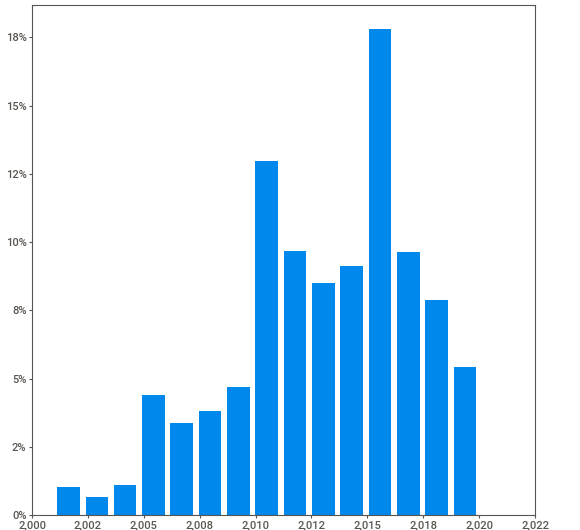
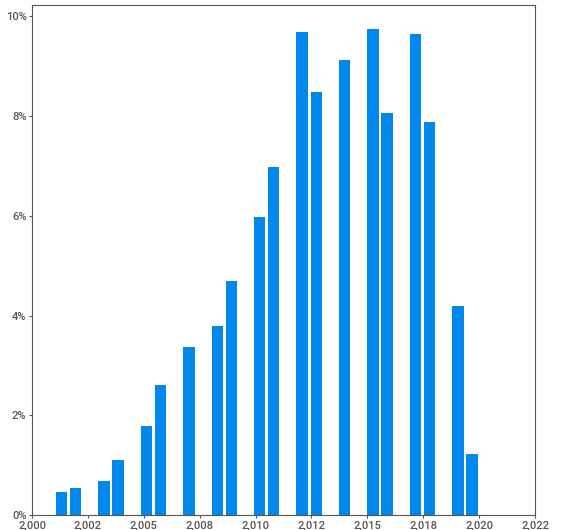
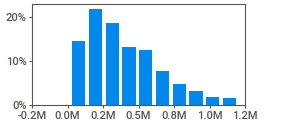
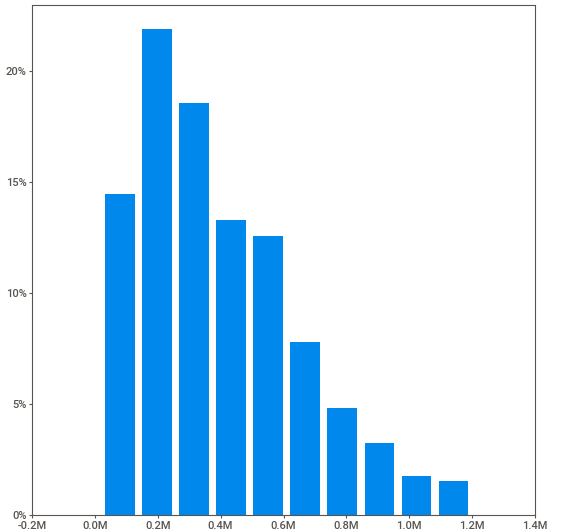
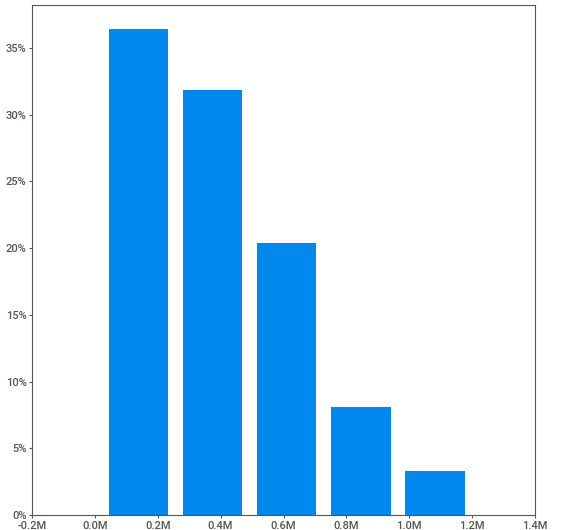
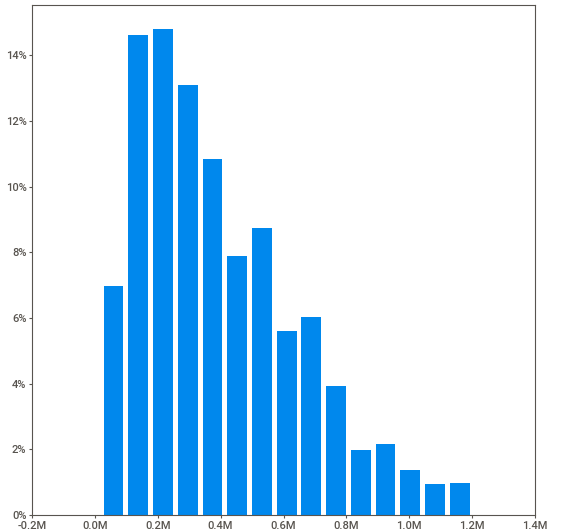
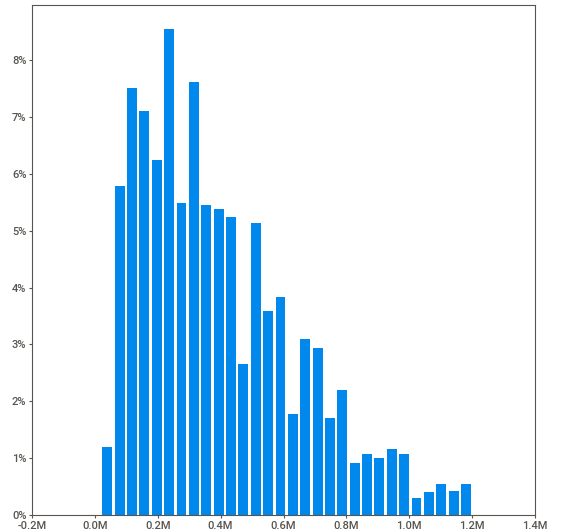
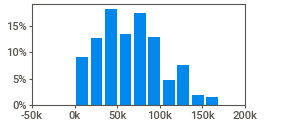
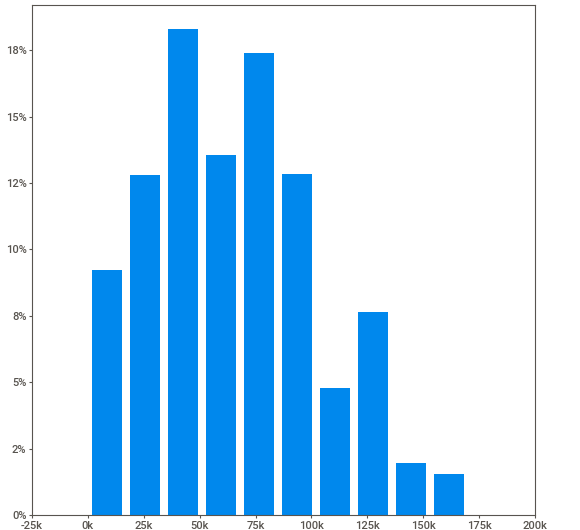
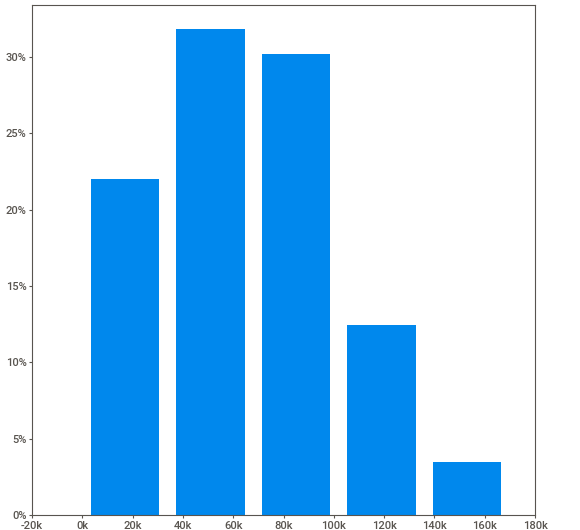
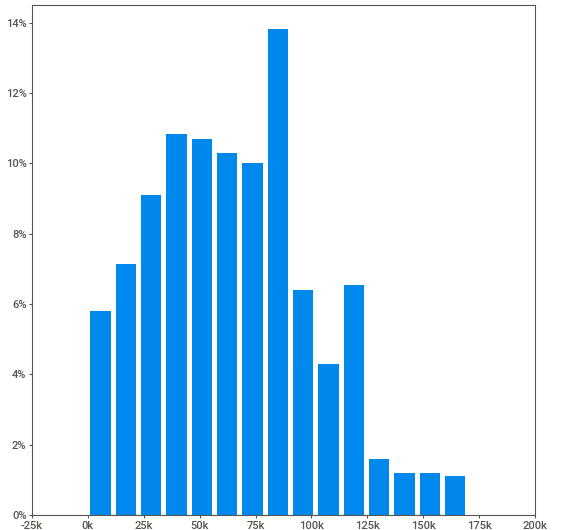
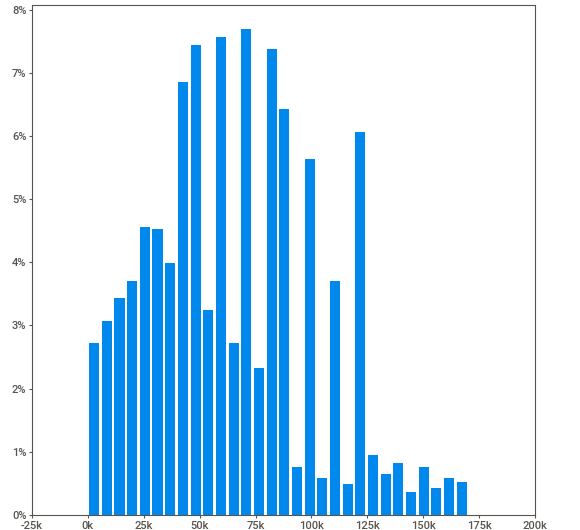
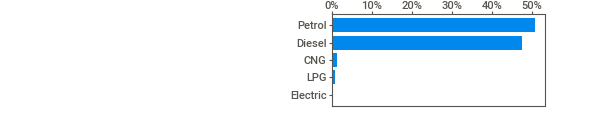
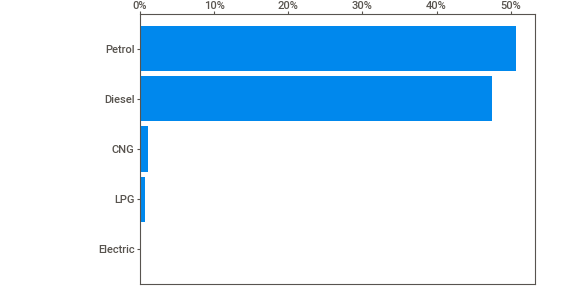
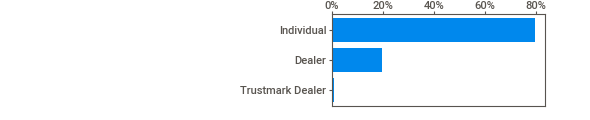
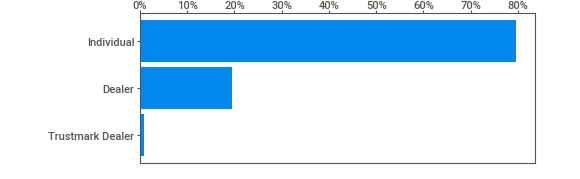
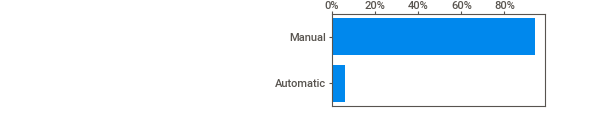
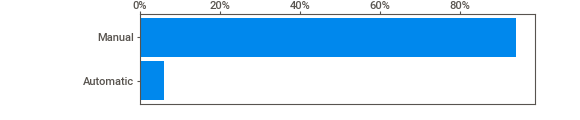
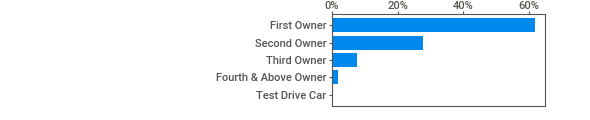
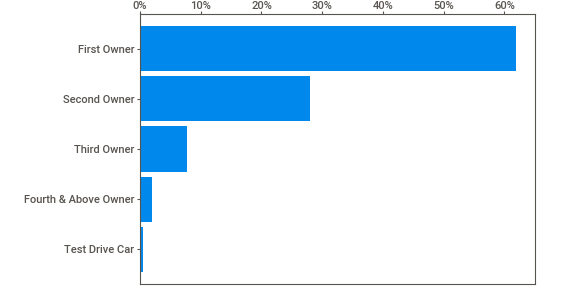
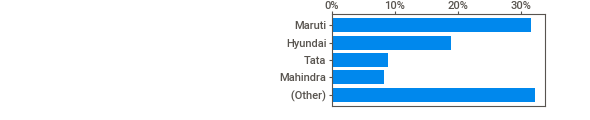
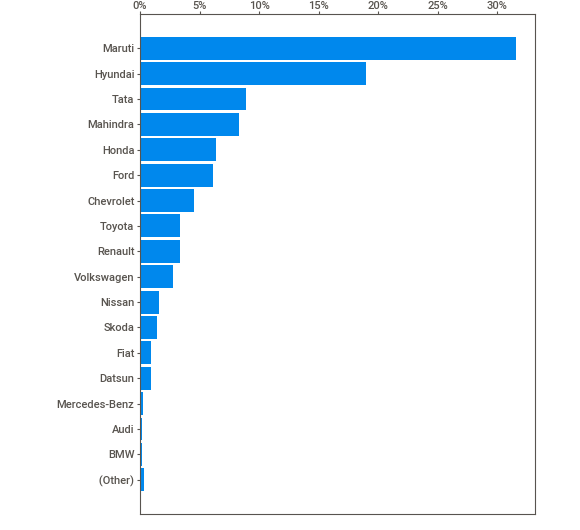
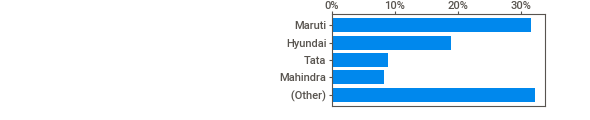
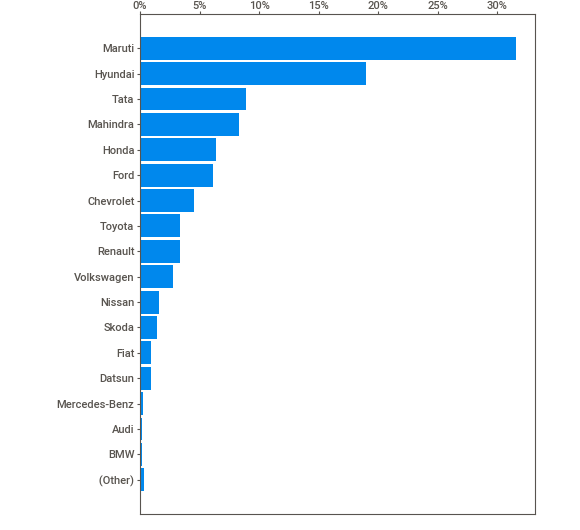
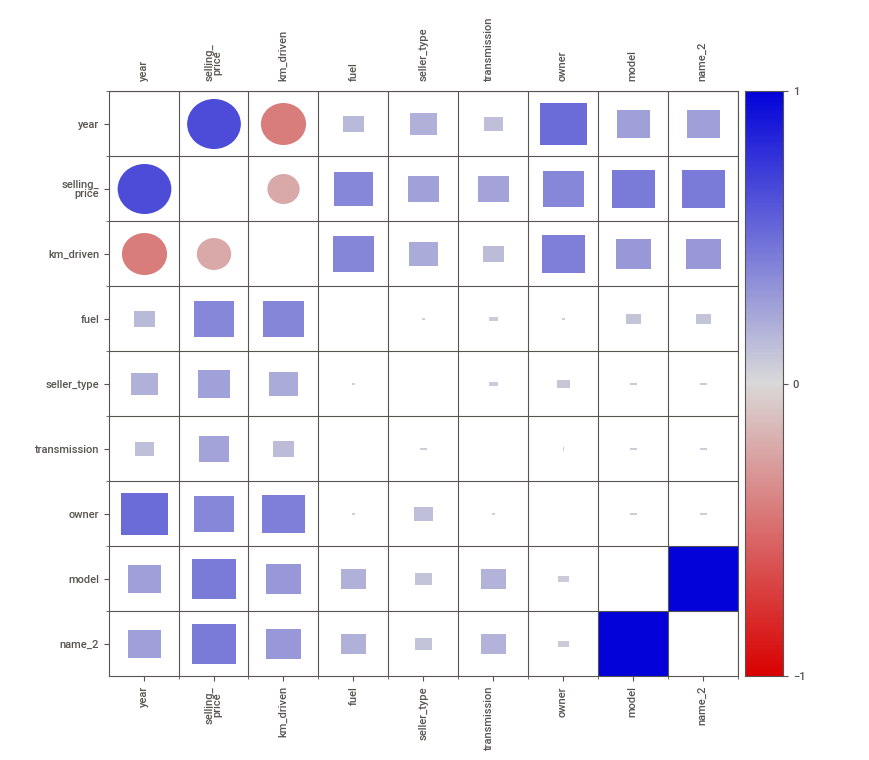
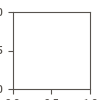

In [117]:
import sweetviz as sv
# Generate the sweetviz report
report = sv.analyze(df)

# Display the report directly in the notebook
report.show_notebook()

In [78]:
# View unique values from categorical features
categorical = [col for col in df.columns if df[col].dtypes == 'O']

for col in categorical:
  print(df[col].unique())

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


 # Different car company list

In [79]:
df["model"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Ford', 'Honda', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Fiat', 'Audi',
       'Datsun', 'BMW', 'Mercedes-Benz', 'Jaguar', 'Mitsubishi', 'Land',
       'Volvo', 'Jeep', 'Ambassador', 'MG', 'OpelCorsa', 'Daewoo', 'Force',
       'Isuzu', 'Kia'],
      dtype='object', name='model')

#% of model selling among all company

In [80]:
def percent(ax):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)

    for i in ax.patches:
        x = i.get_x()+0.2
        height = i.get_height()+4.3
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')

        ax.text(x, height, value, fontsize=14,color='black')

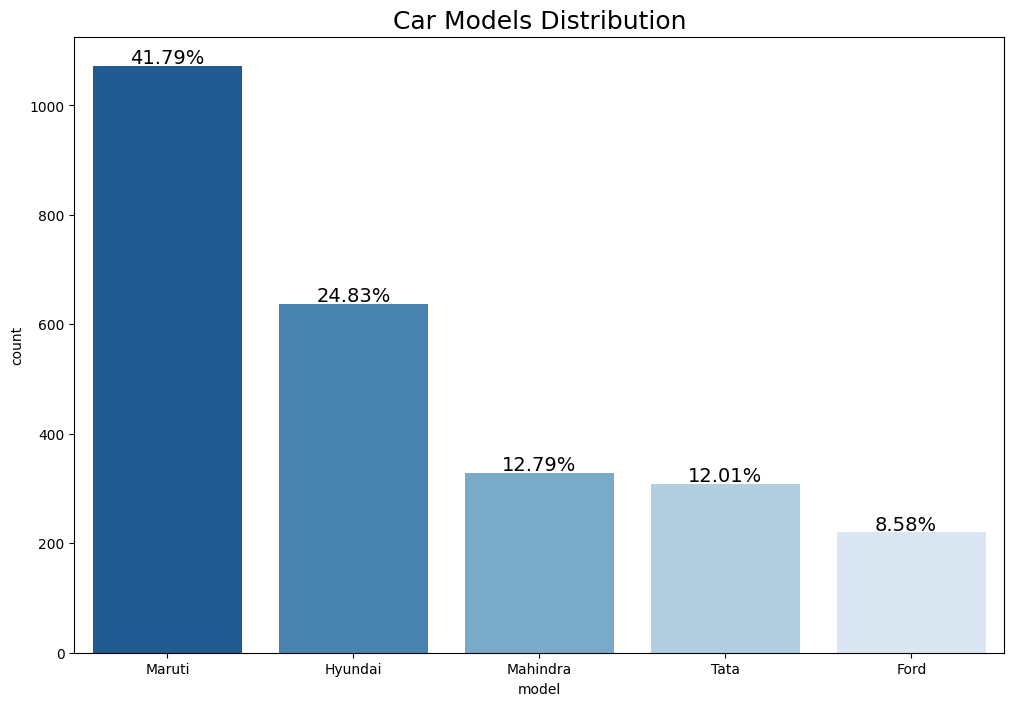

In [81]:
# Plot of Car Models Distribution
figure = plt.figure(figsize=(12,8))
plt.title('Car Models Distribution', fontsize=18)
plot = sns.countplot(x="model", data=df, order = df['model'].value_counts().index[:5], palette='Blues_r')
percent(plot)

plt.show()

In [82]:
df["name_2"] = df.model
df['name_2']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name_2, Length: 3577, dtype: object

#Countplot of sellercount

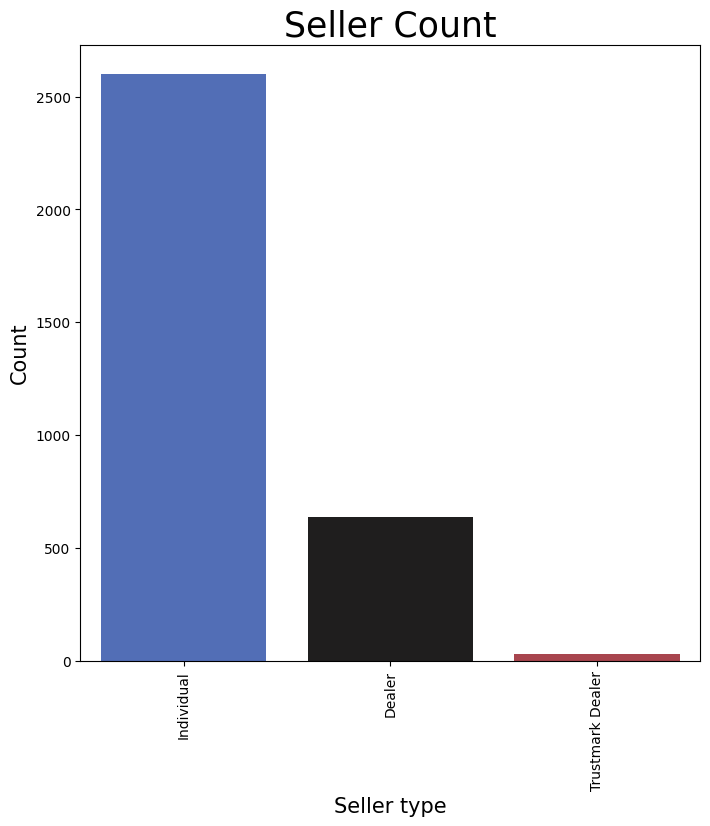

In [102]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x="seller_type",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Seller type",fontsize=15,color="black")
plt.ylabel("Count",fontsize=15,color="black")
plt.title("Seller Count",fontsize=25,color="black")
plt.show()

In [83]:
df["model"].value_counts().index

Index(['Maruti', 'Hyundai', 'Mahindra', 'Tata', 'Ford', 'Honda', 'Toyota',
       'Chevrolet', 'Renault', 'Volkswagen', 'Nissan', 'Skoda', 'Fiat', 'Audi',
       'Datsun', 'BMW', 'Mercedes-Benz', 'Jaguar', 'Mitsubishi', 'Land',
       'Volvo', 'Jeep', 'Ambassador', 'MG', 'OpelCorsa', 'Daewoo', 'Force',
       'Isuzu', 'Kia'],
      dtype='object', name='model')

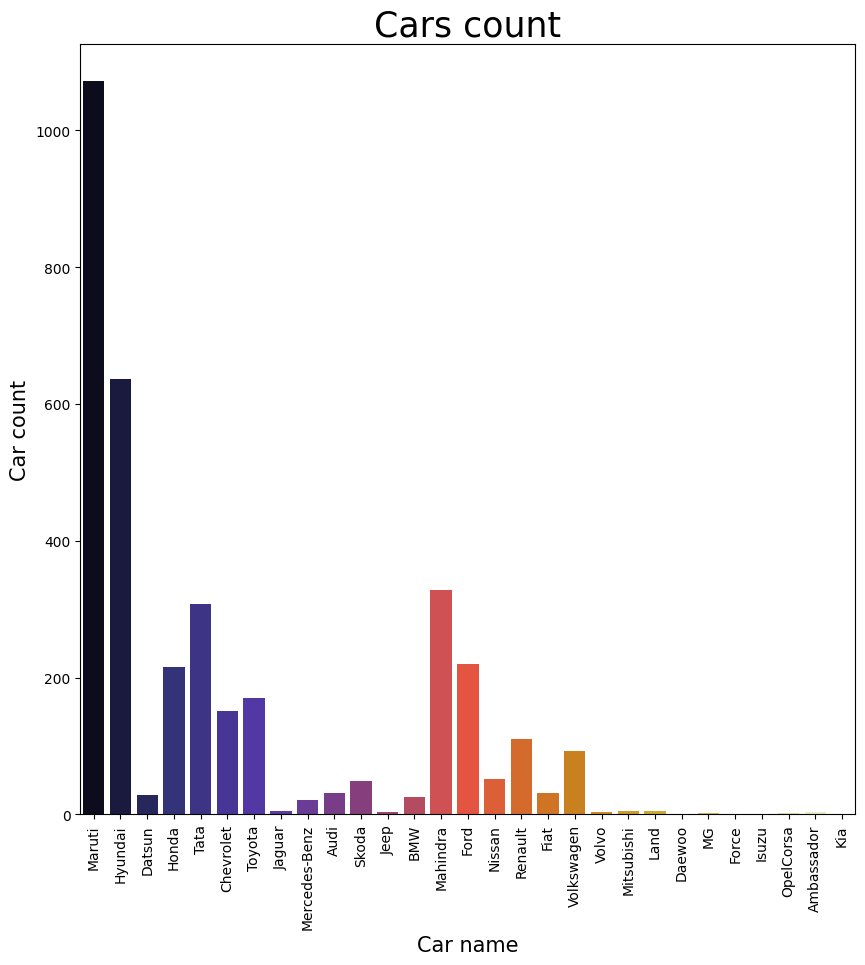

In [84]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="name_2",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Car name",fontsize=15,color="black")
plt.ylabel("Car count",fontsize=15,color="black")
plt.title("Cars count",fontsize=25)
plt.show()

#Top 10 model that selled

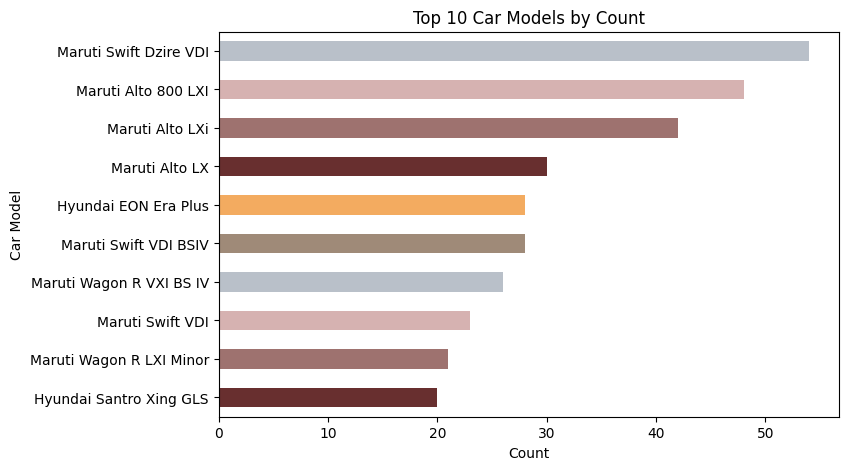

In [85]:
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
# Example bar plot with custom colors
ax = df['name'].value_counts().head(10).sort_values().plot(kind='barh', figsize=(8, 5), color=palette)
plt.xlabel('Count')
plt.ylabel('Car Model')
plt.title('Top 10 Car Models by Count')
plt.show()

Maruti Cars are having overall higher selling price

In [86]:
#number of model count
df['model'].value_counts()

model
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

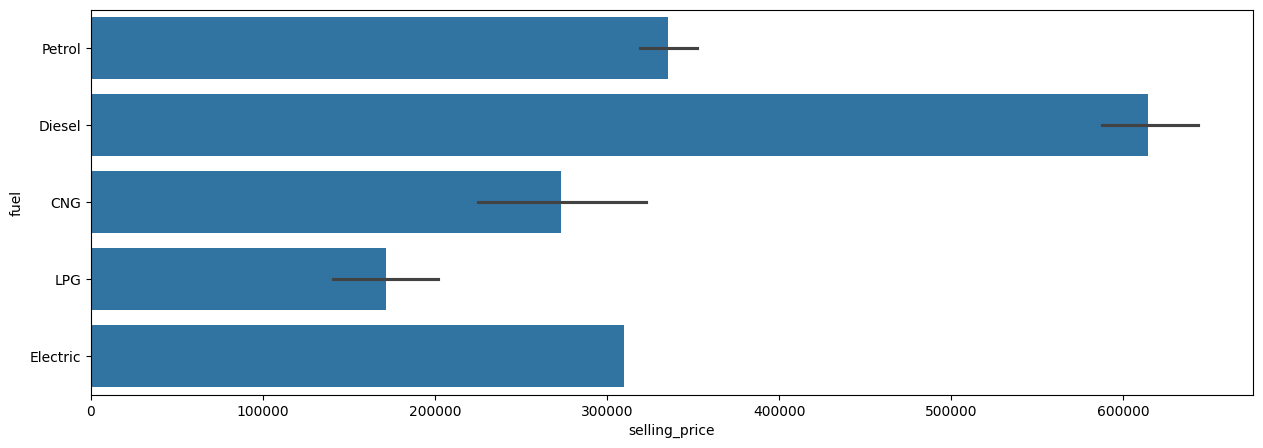

In [87]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, y = 'fuel',x='selling_price')
plt.show()

Diesel cars are having higher selling price among other car

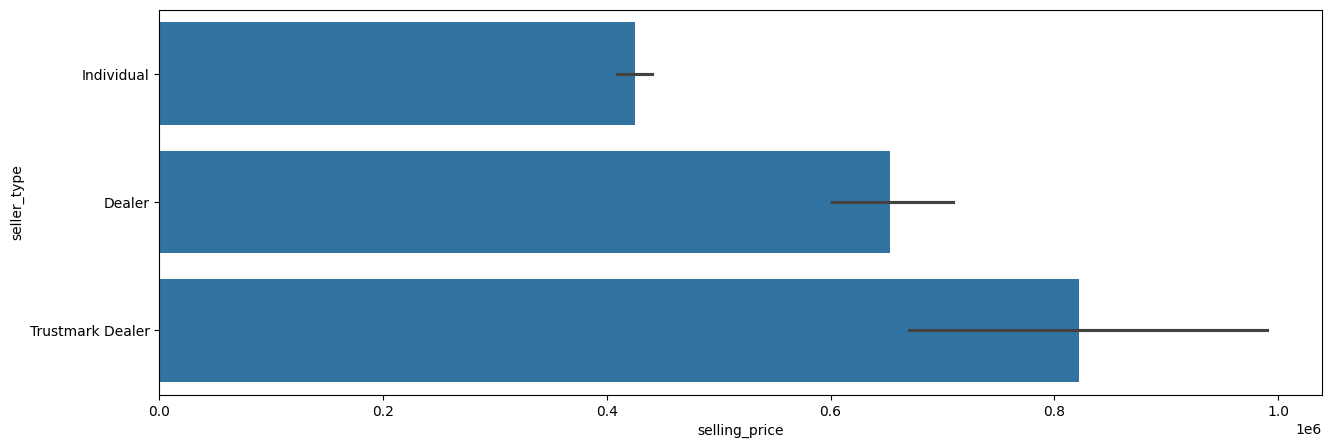

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, y = 'seller_type',x='selling_price')
plt.show()

Trustmark dealers are having higher selling price

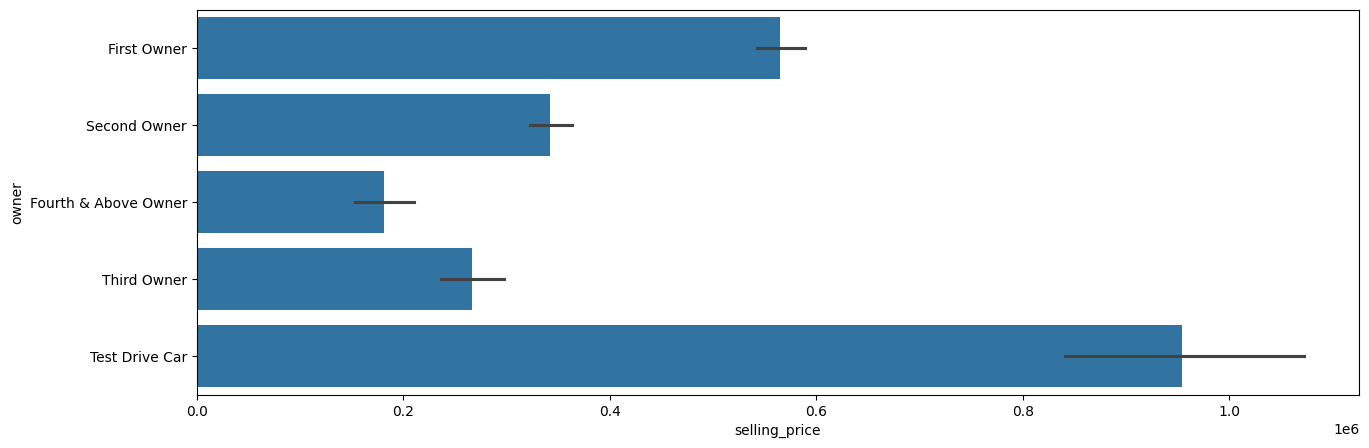

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, y = 'owner',x='selling_price')
plt.show()

Test Drive cars are having higher price

#Owner count bar

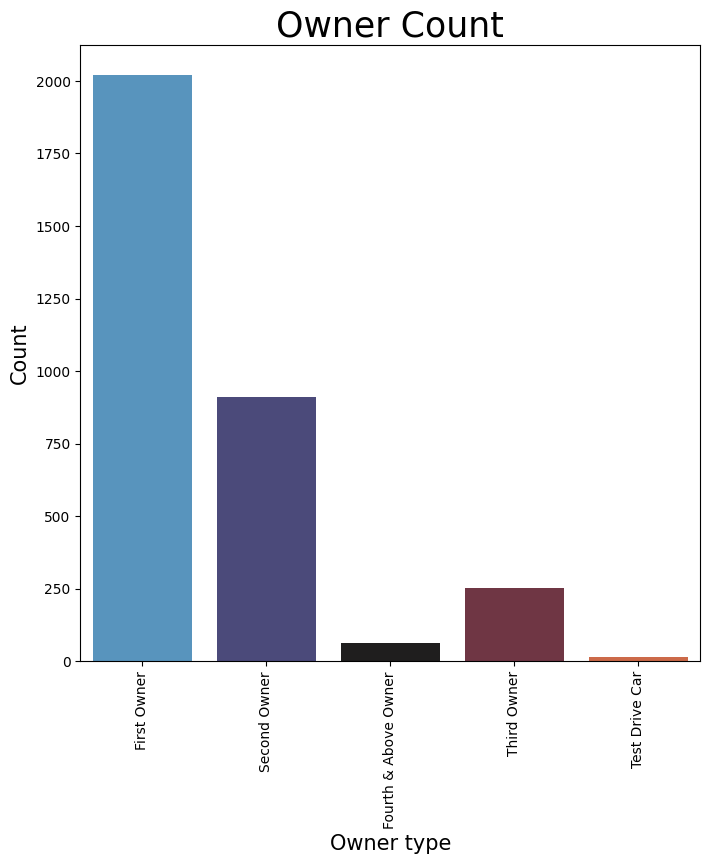

In [100]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x="owner",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Owner type",fontsize=15,color="black")
plt.ylabel("Count",fontsize=15,color="black")
plt.title("Owner Count",fontsize=25,color="black")
plt.show()

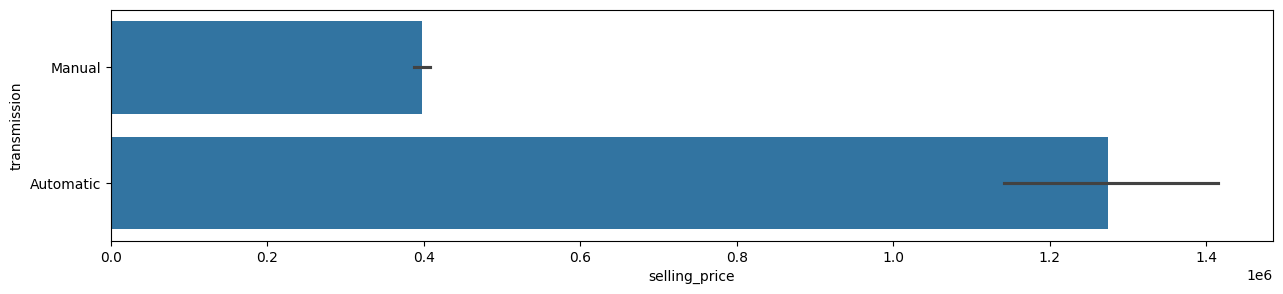

In [90]:
plt.figure(figsize=(15,3))
sns.barplot(data=df, y = 'transmission',x='selling_price')
plt.show()

Automatic Cars are having higher selling price

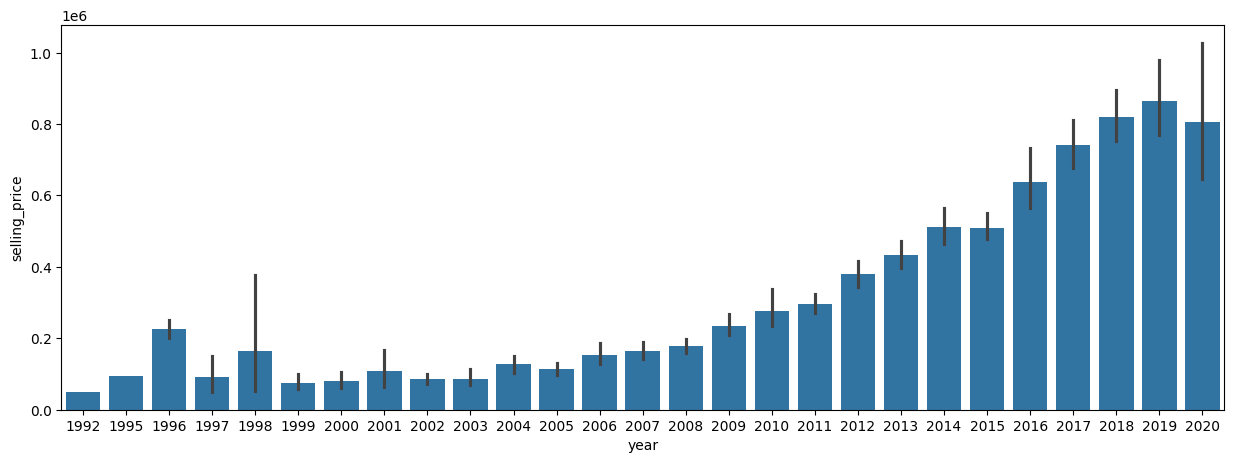

In [91]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x = 'year',y='selling_price')
plt.show()

Newer the car is, higher the selling price it will have reduce price getting older

<Figure size 1500x500 with 0 Axes>

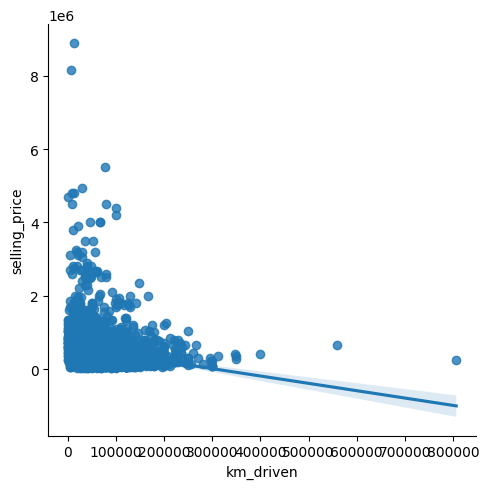

In [92]:
plt.figure(figsize=(15,5))
sns.lmplot(data=df, x = 'km_driven',y='selling_price')
plt.show()

If the Kilometer driven are lesser more the price  of car

#How does Categorical Feature affects selling_price

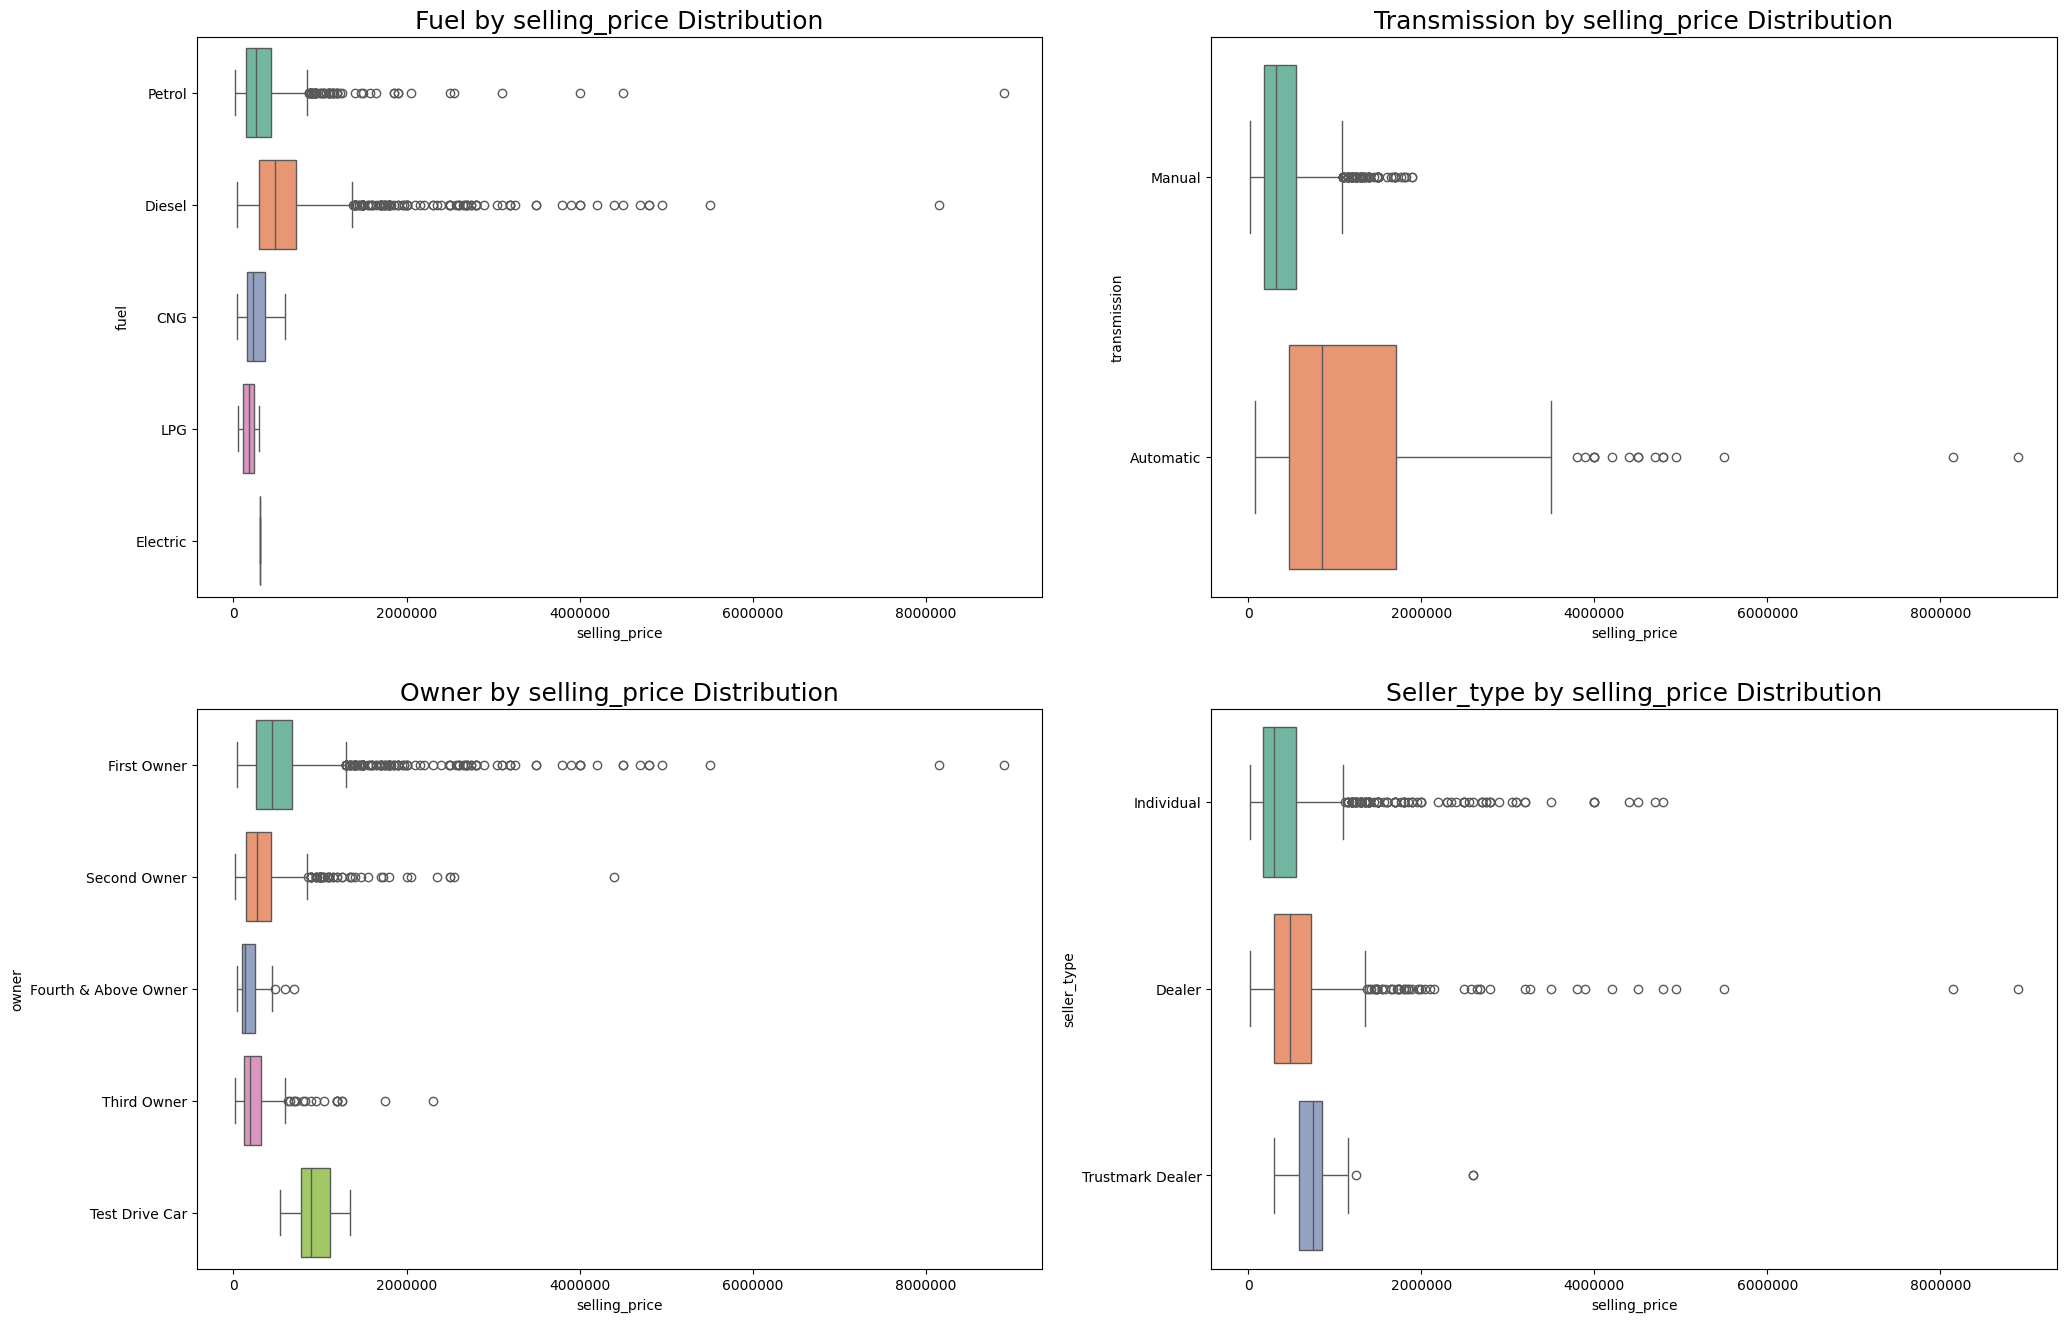

In [93]:
plt.figure(figsize=(24,16))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=18)
sns.boxplot(data=df, x='selling_price', y='fuel', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=18)
sns.boxplot(data=df, x='selling_price', y='transmission', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=18)
sns.boxplot(data=df, x='selling_price', y='owner', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=18)
sns.boxplot(data=df, x='selling_price', y='seller_type', palette='Set2')
plt.ticklabel_format(style='plain', axis='x')

In the Car Dekho dataset, Cars with the Diesel Fuel type have more influence on Selling Prices, just like the Transmission Automatic type which has more influence on Selling prices than Manual, First Owner also has a high influence on Selling Prices, and Seller Type Dealer also has a high influence on Selling Price.

#Countplot of all years car selling

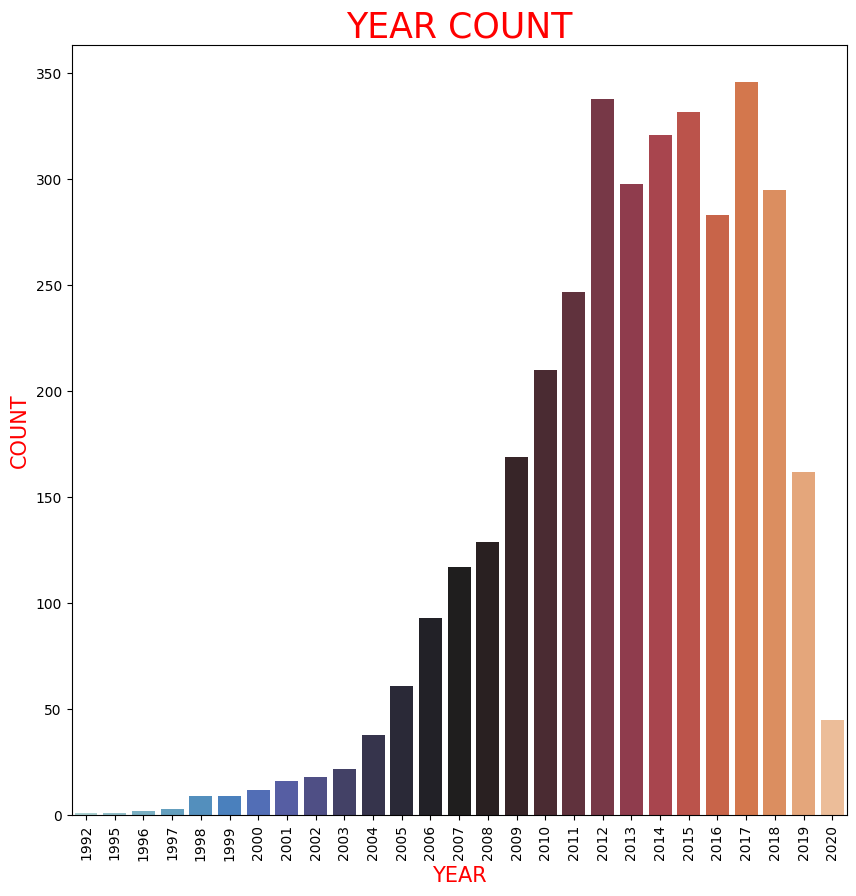

In [94]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=15,color="RED")
plt.ylabel("COUNT",fontsize=15,color="RED")
plt.title("YEAR COUNT",fontsize=25,color="RED")
plt.show()

#Pie chart of top 5 cars

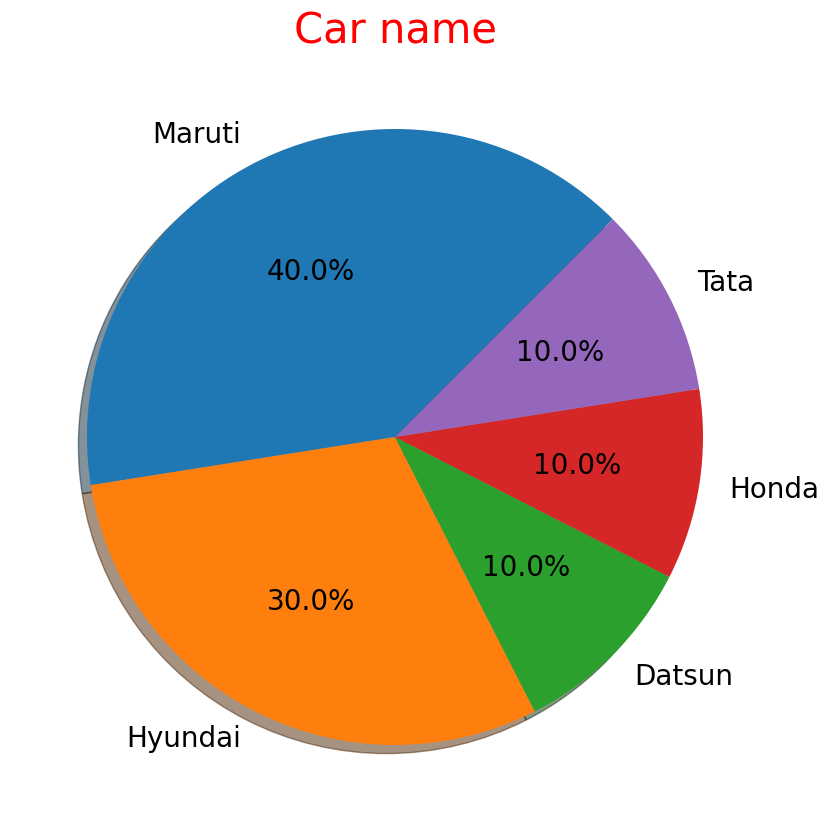

In [95]:
labels =df["name_2"][:10].value_counts().index
sizes =df["name_2"][:10].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=True, startangle=45,textprops={'fontsize':20})
plt.title('Car name',color = 'red',fontsize = 30)
plt.show()

#Boxplot of all cars to find outliers

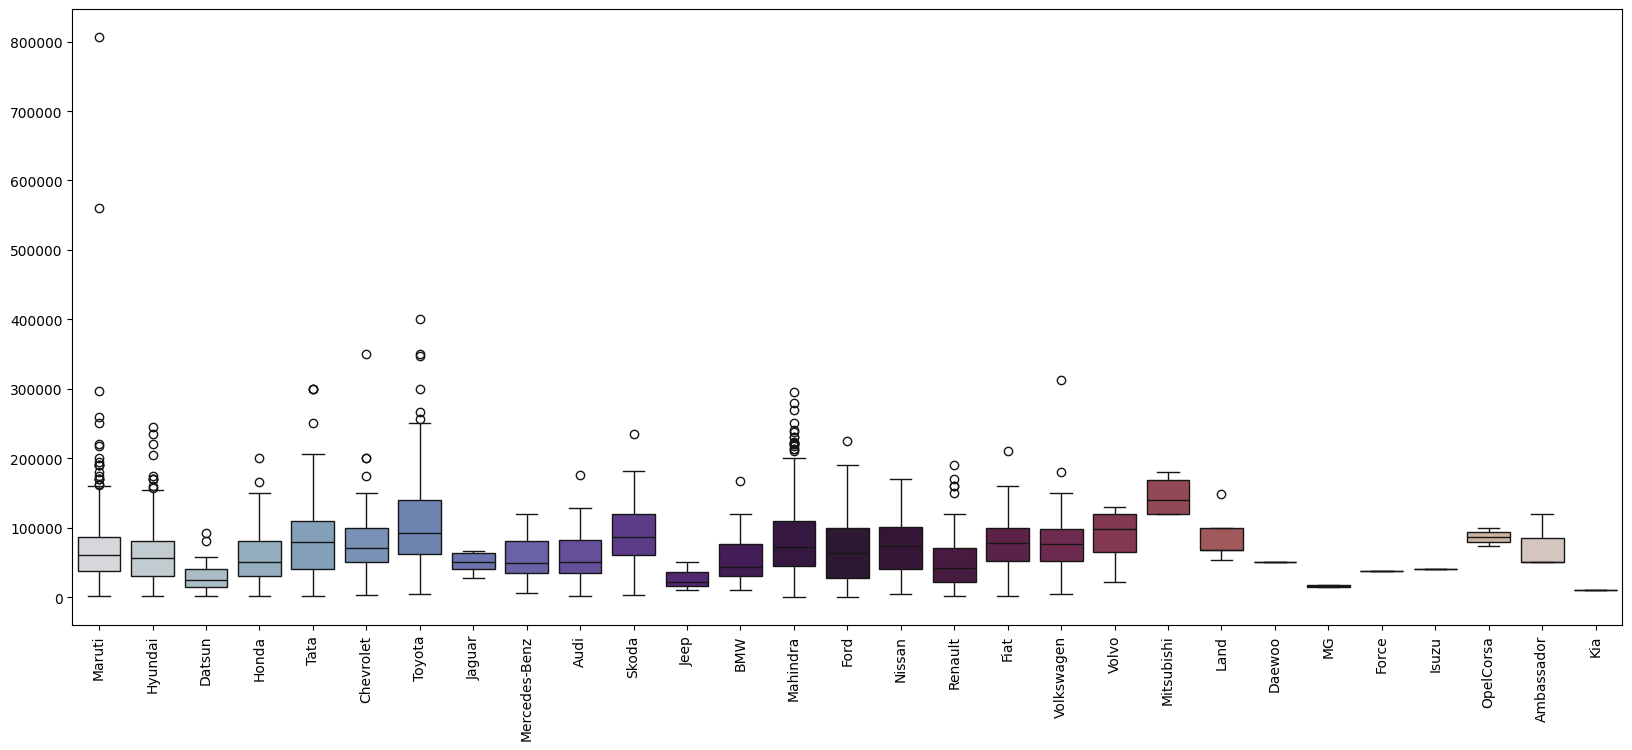

In [96]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df["name_2"].values, y =df["km_driven"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()

#compare to Transmission mode(automatic/manual)

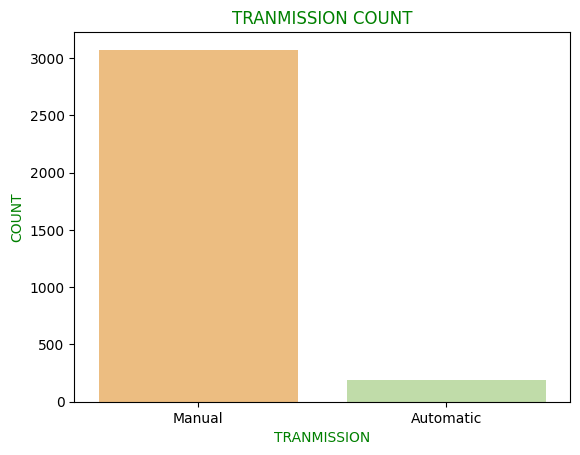

In [106]:
sns.countplot(data=df,x="transmission",palette="Spectral")
plt.xlabel("TRANMISSION",fontsize=10,color="GREEN")
plt.ylabel("COUNT",fontsize=10,color="GREEN")
plt.title("TRANMISSION COUNT",color="GREEN")
plt.show()

#Name(company) and transmission mode

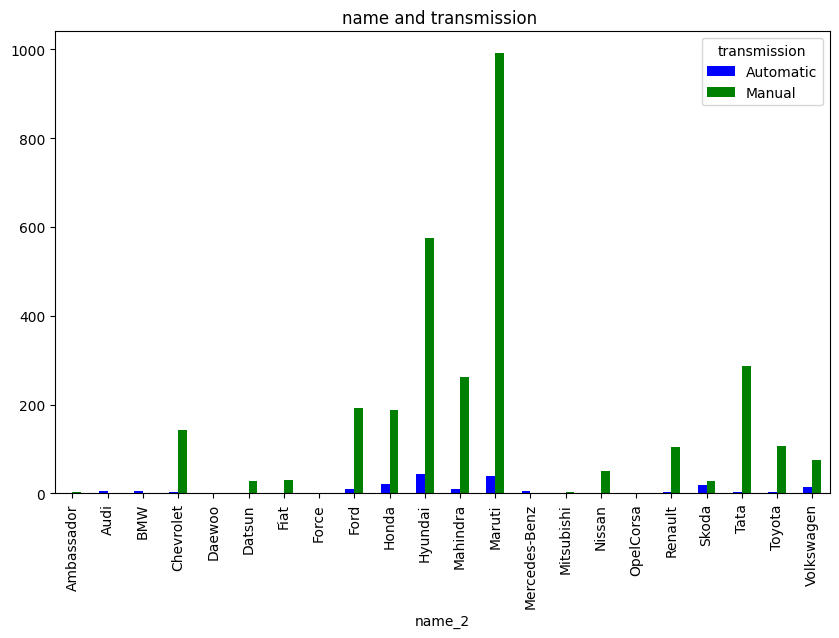

In [105]:
#compare Automatic and manual in every company
pd.crosstab(df["name_2"], df["transmission"]).plot(kind="bar", figsize=(10, 6), color=["blue","green"], title="name and transmission ")
plt.show()

##Outlier Treatment

In [97]:
# Outlier treatment function
def outlier_treatment(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1

    df_rem_out = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_rem_out

df = outlier_treatment(df)

#After treating outlier check in box plot

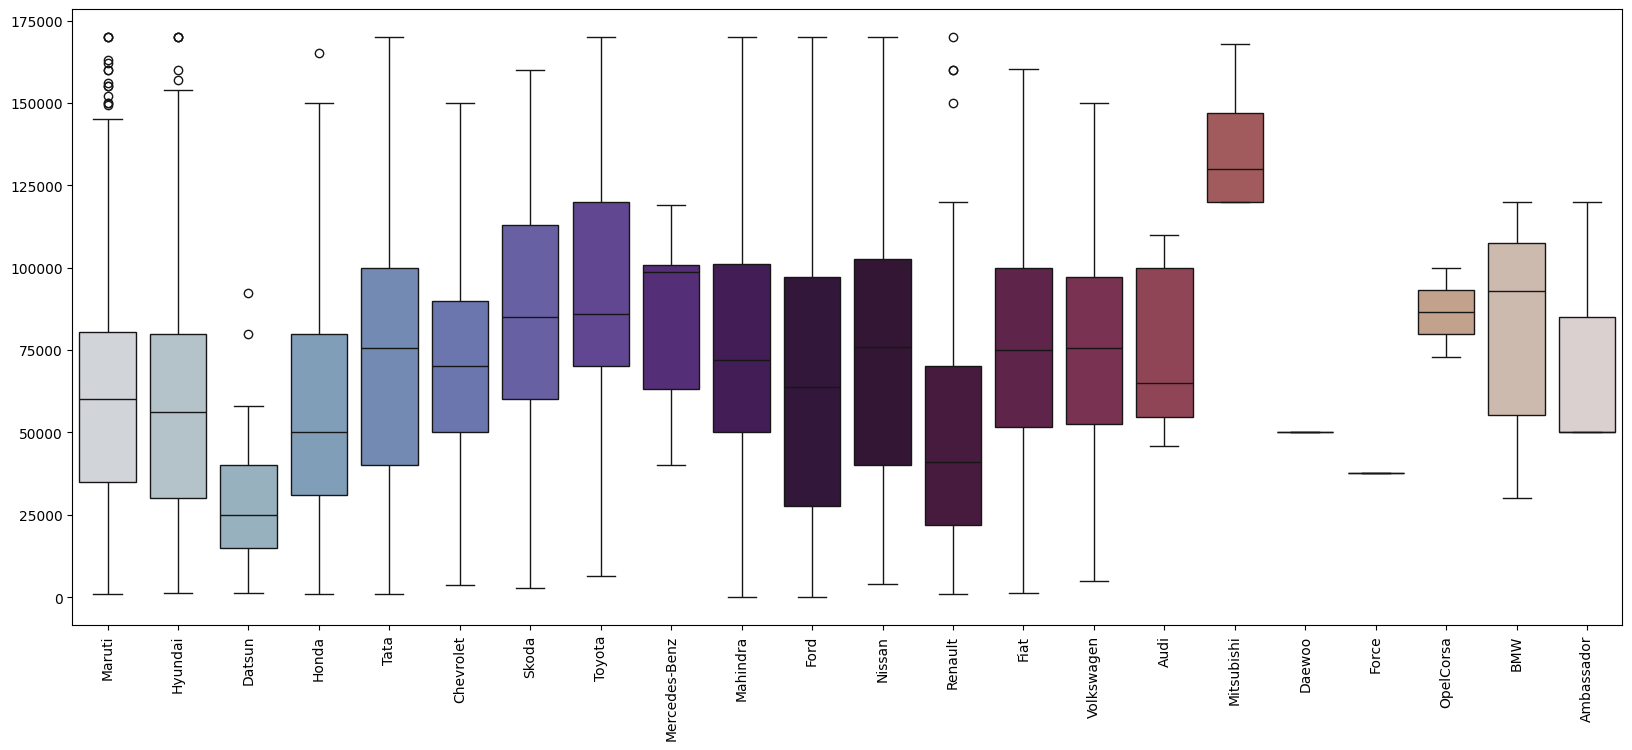

In [98]:
f, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x=df["name_2"].values, y =df["km_driven"].values,palette="twilight",ax=ax)
plt.xticks(rotation=90)
plt.show()

##Conclusion
-The Maruti model car has higher units in the Car Dekho dataset after Hyundai and Mahindra.\
Fuel from cars with the Diesel type has a higher amount, the same as Manual Transmissions, First Owner Cars, and Individual Sellers.\
IF there is a new car, the selling price will be high, and if the car is the latest, the KM Driven will be low.\
Look for a quality car by looking at the number of KM Driven cars and the year the car was purchased. You also need to know the Owner Type and Seller Type because both of them can affect the Selling Price apart from KM Driven and Year.